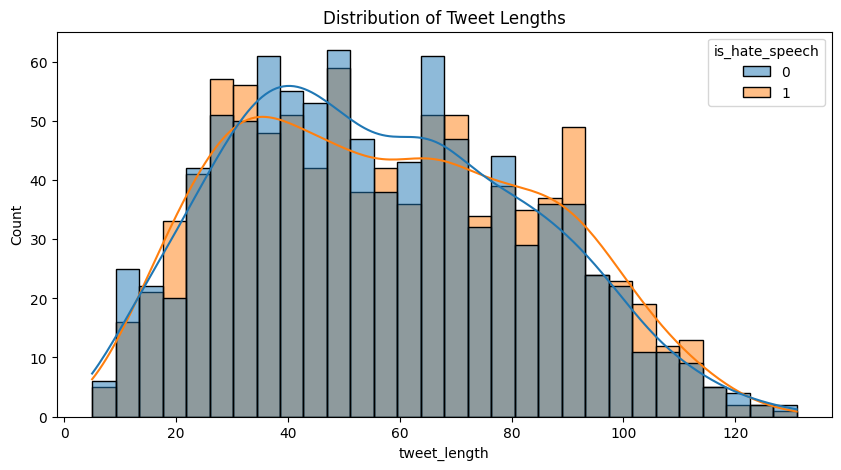

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from sklearn.decomposition import LatentDirichletAllocation
import nltk
import re

# Load your dataset
df = pd.read_csv("/content/data.csv")

# 1. Distribution of Tweet Lengths
df['tweet_length'] = df['cleaned_tweet'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tweet_length', hue='is_hate_speech', bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.show()




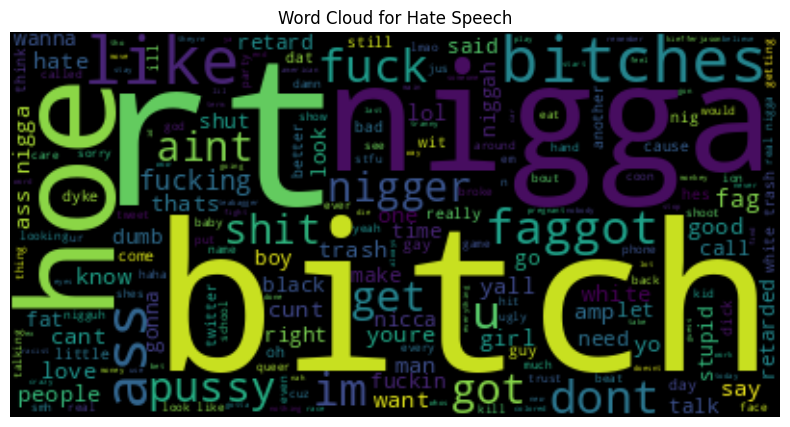

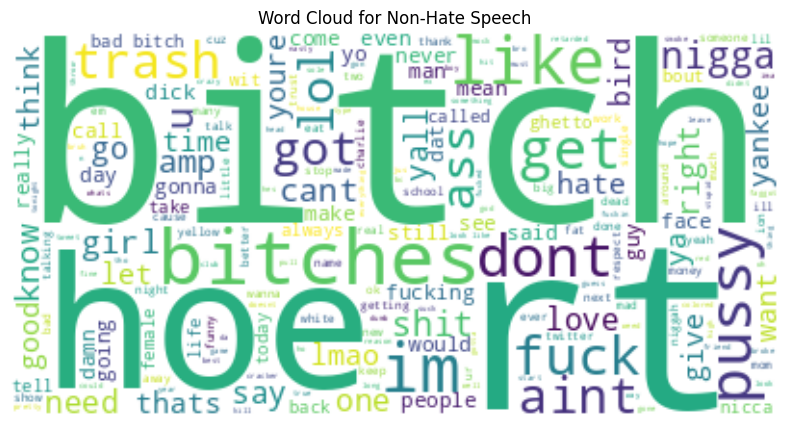

In [4]:
# 2. Word Cloud for Hate Speech and Non-Hate Speech
hate_speech_text = ' '.join(df[df['is_hate_speech'] == 1]['cleaned_tweet'])
non_hate_speech_text = ' '.join(df[df['is_hate_speech'] == 0]['cleaned_tweet'])

# Hate Speech Word Cloud
plt.figure(figsize=(10, 5))
wordcloud_hate = WordCloud(stopwords=stopwords.words('english'), background_color='black').generate(hate_speech_text)
plt.imshow(wordcloud_hate, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Hate Speech')
plt.show()

# Non-Hate Speech Word Cloud
plt.figure(figsize=(10, 5))
wordcloud_non_hate = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(non_hate_speech_text)
plt.imshow(wordcloud_non_hate, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Non-Hate Speech')
plt.show()



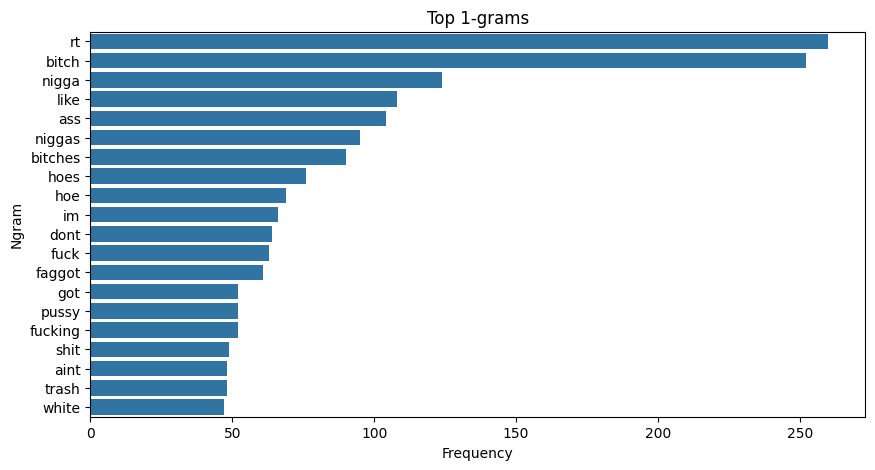

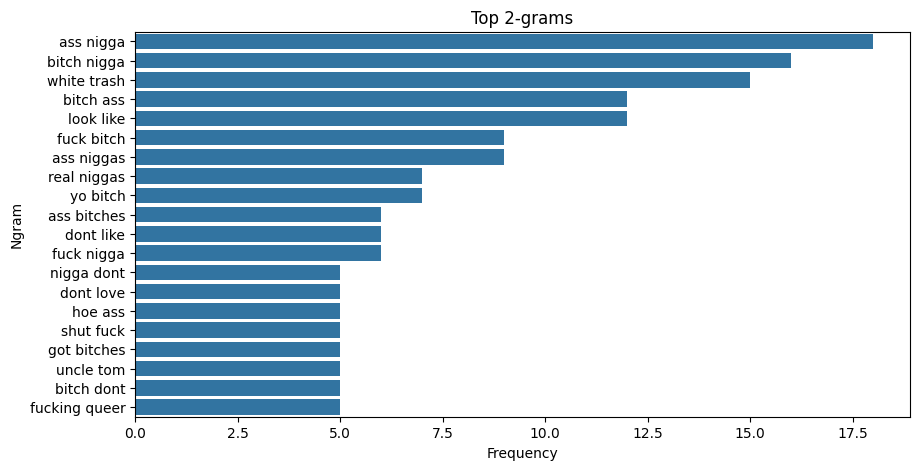

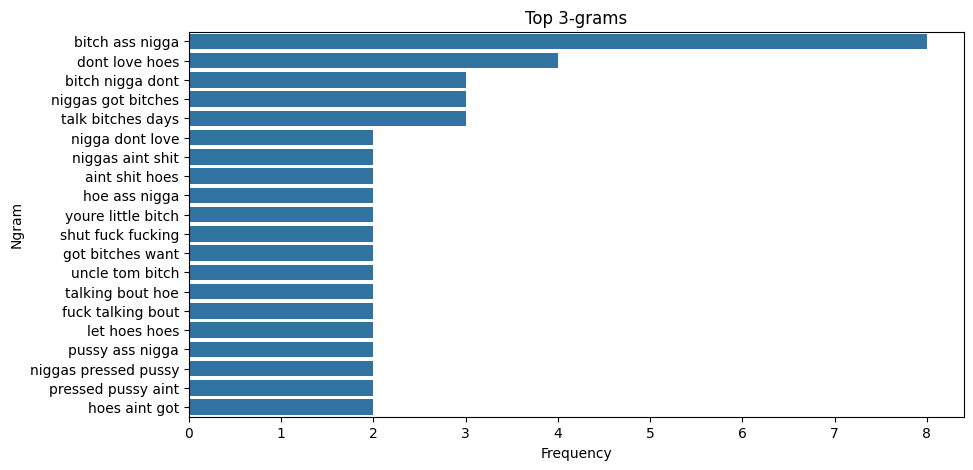

In [5]:
# 3. Top N-grams
def plot_top_ngrams(corpus, n=1, top_n=20):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    df_ngram = pd.DataFrame(words_freq, columns=['Ngram', 'Frequency'])
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='Ngram', data=df_ngram)
    plt.title(f'Top {n}-grams')
    plt.show()

# Top Unigrams, Bigrams, Trigrams in Hate Speech
plot_top_ngrams(df[df['is_hate_speech'] == 1]['cleaned_tweet'], n=1)
plot_top_ngrams(df[df['is_hate_speech'] == 1]['cleaned_tweet'], n=2)
plot_top_ngrams(df[df['is_hate_speech'] == 1]['cleaned_tweet'], n=3)



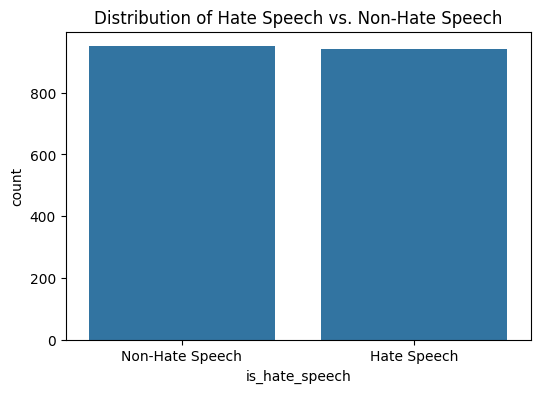

In [6]:
# 4. Distribution of Hate Speech vs. Non-Hate Speech
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_hate_speech')
plt.title('Distribution of Hate Speech vs. Non-Hate Speech')
plt.xticks([0, 1], ['Non-Hate Speech', 'Hate Speech'])
plt.show()



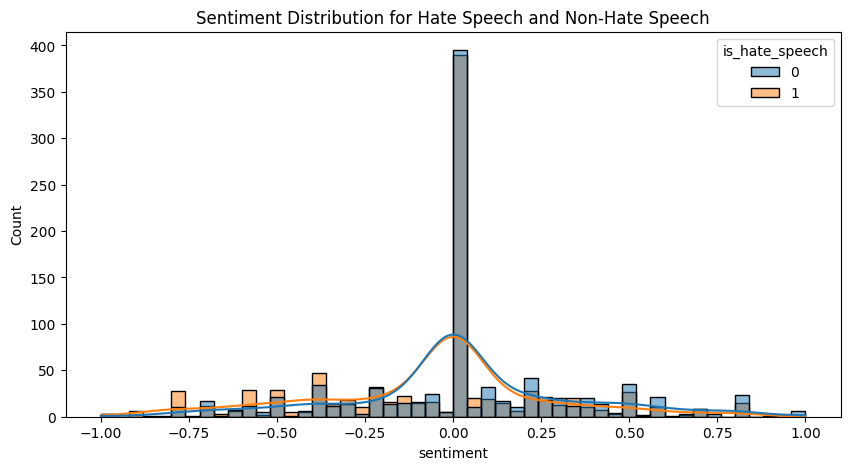

In [7]:
# 5. Sentiment Analysis Distribution
df['sentiment'] = df['cleaned_tweet'].apply(lambda text: TextBlob(text).sentiment.polarity)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='sentiment', hue='is_hate_speech', kde=True)
plt.title('Sentiment Distribution for Hate Speech and Non-Hate Speech')
plt.show()



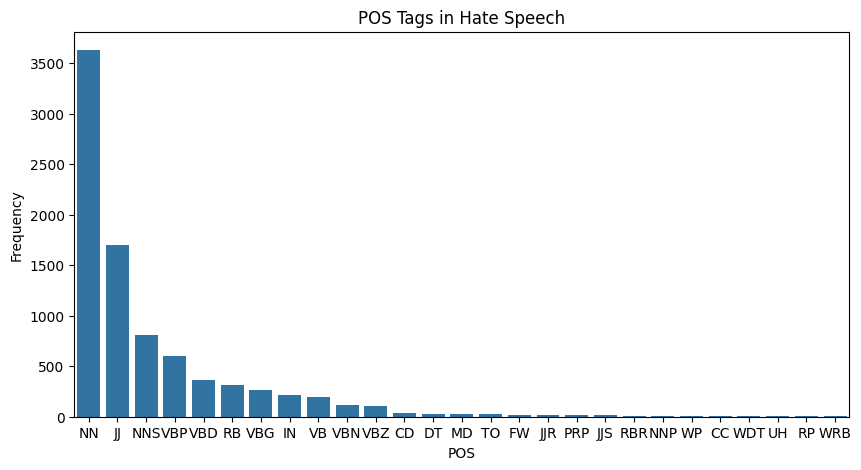

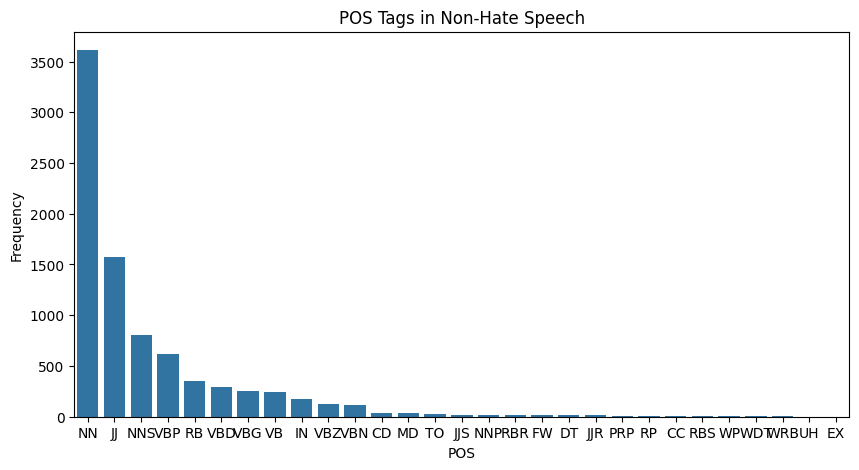

In [8]:
# 6. Common Part-of-Speech (POS) Tags
def plot_pos_tags(text, title):
    tokens = word_tokenize(text)
    pos_counts = nltk.FreqDist([tag for _, tag in pos_tag(tokens)])
    pos_df = pd.DataFrame(pos_counts.items(), columns=['POS', 'Frequency'])
    pos_df = pos_df.sort_values(by='Frequency', ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x='POS', y='Frequency', data=pos_df)
    plt.title(title)
    plt.show()

hate_text_combined = ' '.join(df[df['is_hate_speech'] == 1]['cleaned_tweet'])
non_hate_text_combined = ' '.join(df[df['is_hate_speech'] == 0]['cleaned_tweet'])

plot_pos_tags(hate_text_combined, "POS Tags in Hate Speech")
plot_pos_tags(non_hate_text_combined, "POS Tags in Non-Hate Speech")



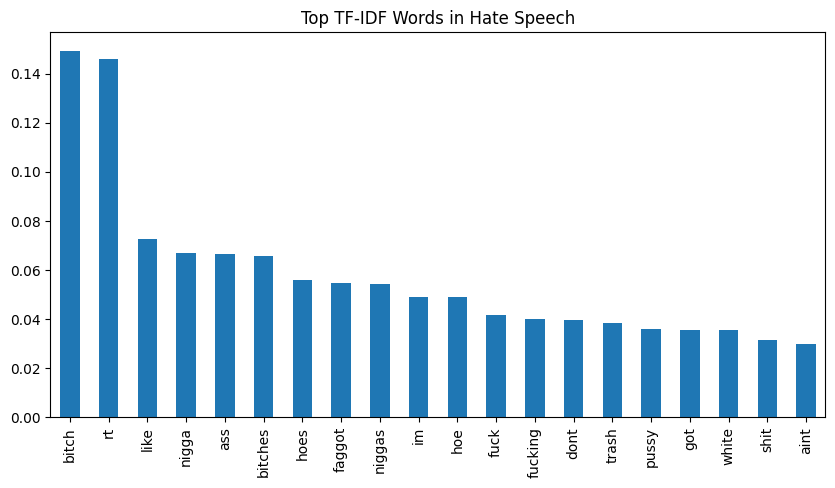

In [9]:
# 7. TF-IDF Feature Analysis
tfidf_vec = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf_vec.fit_transform(df[df['is_hate_speech'] == 1]['cleaned_tweet'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vec.get_feature_names_out())
tfidf_means = tfidf_df.mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
tfidf_means.plot(kind='bar')
plt.title("Top TF-IDF Words in Hate Speech")
plt.show()




In [10]:
#8 . Topic Modeling (LDA)
lda_vec = CountVectorizer(stop_words='english', max_features=1000)
lda_matrix = lda_vec.fit_transform(df[df['is_hate_speech'] == 1]['cleaned_tweet'])
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_model.fit(lda_matrix)
for idx, topic in enumerate(lda_model.components_):
    print(f"Top words in topic #{idx+1}:")
    print([lda_vec.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Top words in topic #1:
['aint', 'im', 'pussy', 'bitches', 'shit', 'ass', 'rt', 'fuck', 'nigga', 'bitch']
Top words in topic #2:
['want', 'nigger', 'im', 'ass', 'like', 'bitches', 'faggot', 'niggas', 'bitch', 'rt']
Top words in topic #3:
['nigga', 'fucking', 'trash', 'fag', 'hoes', 'hoe', 'white', 'like', 'bitch', 'rt']
